# Tarea 1 de Física computacional
## Aquino Chapa Martha Abril
### Hecho en Python

In [137]:
from pylab import *
import random
from numpy import array
from numpy import *
import math

## 1. Realice y explique los desarrollos necesarios para obtener los siguientes algoritmos:
##### (a) Encuentre una expresi´on para la segunda derivada num´erica de orden 4 con malla uniforme. (Se desprecian téminos $h^{5}$ en la serie de Taylor)


Iniciamos expandiendo en serie de Taylor la función f en 4 diferentes puntos alrededor de $x_0$

$$
f(x_0+h)=f(x_0) + f^{(1)}(x_0)h + \frac{f^{(2)}(x_0)}{2!}h^2 + \frac{f^{(3)}(x_0)}{3!}h^3 + \frac{f^{(4)}(x_0)}{4!}h^4 + \mathcal{O}(h^5)
$$
$$
f(x_0-h)=f(x_0) - f^{(1)}(x_0)h + \frac{f^{(2)}(x_0)}{2!}h^2 - \frac{f^{(3)}(x_0)}{3!}h^3 + \frac{f^{(4)}(x_0)}{4!}h^4 + \mathcal{O}(h^5)
$$
$$
f(x_0+2h)=f(x_0) + 2f^{(1)}(x_0)h + 2f^{(2)}(x_0)h^2 + \frac{4}{3}f^{(3)}(x_0)h^3 + \frac{2}{3}f^{(4)}(x_0)h^4 + \mathcal{O}(h^5)
$$
$$
f(x_0-2h)=f(x_0) - 2f^{(1)}(x_0)h + 2f^{(2)}(x_0)h^2 - \frac{4}{3}f^{(3)}(x_0)h^3 + \frac{2}{3}f^{(4)}(x_0)h^4 + \mathcal{O}(h^5)
$$
Debido a que queremos queremos la segunda derivada de orden cuatro despreciamos los términos de orden $h^5$, sumamos la primera y segunda expresión así como la tercera y cuarta expresión. Con lo que obtenemos las siguientes dos ecuaciones:

$$
f(x_0+h)+f(x_0-h)=2f(x_0)+f^{(2)}(x_0)h^2 + \frac{1}{12}f^{(4)}(x_0)h^4
$$
$$
f(x_0+2h)+f(x_0-2h)=2f(x_0)+4f^{(2)}(x_0)h^2 + \frac{4}{3}f^{(4)}(x_0)h^4
$$

Ahora mutiplicamos la primera de estas igualdades por $16$ y la segundad igualdad por $-1$ tenemos el siguiente sistema de ecuaciones:
$$
16f(x_0+h)+16f(x_0-h)=32f(x_0) + 16f^{(2)}(x_0)h^2 + \frac{4}{3}f^{(4)}(x_0)h^4
$$
$$
-f(x_0+2h)-f(x_0-2h)=-2f(x_0)-4f^{(2)}(x_0)h^2 - \frac{4}{3}f^{(4)}(x_0)h^4
$$
Al sumar las dos ecuaciones anteriores se obtiene: 
$$
16f(x_0+h)+16f(x_0-h)-f(x_0+2h)-f(x_0-2h)=30f(x_0)+12f^{(2)}(x_0)h^2
$$

Por lo que tenemos la expresión para la segunda derivada de orden cuatro:

$$
f^{(2)}(x_0) = \frac{16f(x_0+h)+16f(x_0-h)-f(x_0+2h)-f(x_0-2h) - 30f(x_0)}{12h^2}
$$
Donde se ha tomado $h=[x+i]-h[i]$ y con esto nos es posible escribir la segunda derivada de orden cuatro en $x[i]$ como:
$$
f_i'' = \frac{-\frac{26}{3}f_{i+1}+\frac{19}{2}f_{i+2}-\frac{14}{3}f_{i+3}+\frac{11}{12}f_{i+4}+\frac{35}{12}f_i}{h^2}
$$

Hay que notar que la expresión anterior hace uso del hecho de que se tienen puntos a la derecha y a la izquiera de $x_0$, por lo cual la expresión anterior no se vale en los puntos frontera. Entonces obtengamos la derivada en los puntos frontera. Por lo cual es necesario conocer la segunda entrada del siguiente sistema de ecuaciones:
$$
\begin{bmatrix}
1 & \frac{1}{2} & \frac{1}{6} & \frac{1}{24} \\
2 & 2 & \frac{4}{3} & \frac{2}{3} \\
3 & \frac{9}{2} & \frac{9}{2} & \frac{27}{8} \\
4 & 8 & \frac{32}{3} & \frac{32}{3}
\end{bmatrix}
\begin{bmatrix}
hf_i' \\
h^2f_i'' \\
h^3f_i''' \\
h^4f_i''''
\end{bmatrix}
=
\begin{bmatrix}
f_{i+1}-f_i \\
f_{i+2}-f_i \\
f_{i+3}-f_i \\
f_{i+4}-f_i 
\end{bmatrix}
$$
Al resolver se llega a que:
$$
f_i'' = \frac{-\frac{26}{3}f_{i+1}+\frac{19}{2}f_{i+2}-\frac{14}{3}f_{i+3}+\frac{11}{12}f_{i+4}+\frac{35}{12}f_i}{h^2}
$$



##### (b) Encuentre una expresión para la derivada numérica de 2o orden para una malla no uniforme. (Se desprecian términos $h^{3}$ en la serie de Taylor)
Debido a que queremos la derivada en una malla no uniforme, tendremos dos valores de h, h1 para el lado izquierdo y h2 para el lado derecho, además despreciaremos términos $h^{3}$, consideremos entonces los siguientes expansiones en serie de Taylor alrededor de un punto $x_0$:
$$
f(x_0-h_1)=f(x_0)-f^{(1)}(x_0)h_1 + \frac{1}{2}f^{(2)}(x_0)h_1^2 + \mathcal{O}(h^3)
$$

$$
f(x_0+h_2)=f(x_0)+f^{(1)}(x_0)h_2 + \frac{1}{2}f^{(2)}(x_0)h_2^2 + \mathcal{O}(h^3)
$$
Nultiplicamos por $h_2$ la primera ecuación y por $h_2$ la segunda y las restamos las ecuaciones anteriores se obtiene:


$$ h_2^{2}f(x_0-h_1)=h_2^{2}f(x_0)-h_2^{2}f^{(1)}(x_0)h_1+{\frac{1}{2}}f^{(2)}(x_0)h_1^{2}+\mathcal{O}(h^{3})  $$

$$
h_1^{2}f(x_0+h_2)=h_1^{2}f(x_0)+h_1^{2}f^{(1)}(x_0)h_2 + h_1^{2}\frac{1}{2}f^{(2)}(x_0)h_2^2 + \mathcal{O}(h^3)
$$

Restando las dos ecuaciones anteriores:
$$h_1^{2}f(x_0+h_2)-h_2^{2}f(x_0-h_1)=f(x_0)(h_1^{2}-h_2^{2})+f^{(1)}(x_0)(h_2^{2}h_1+h_2h_1^{2}) $$

Por lo cual se obtiene que la segunda derivada de 2do orden, en los puntos que no están en la frontera está dados por:
$$ f^{(1)}(x_0)={\frac{h_1^{2}f(x_0+h_2)-h_2^{2}f(x_0-h_1)-f(x_0)(h_1^{2}-h_2^{2})}{h_2^{2}h_1+h_2h_1^{2}}} $$

Veamos ahora la situación con los puntos en la frontera:


$$
\begin{bmatrix}
-h_1 & \frac{h_1^{2}}{2}\\
h_2 &  \frac{h_2^{2}}{1} \\
\end{bmatrix}
\begin{bmatrix}
f_i' \\
f_i'' \\
\end{bmatrix}
=
\begin{bmatrix}
f_{i-1}-f_i \\
f_{i+1}-f_i \\
\end{bmatrix}
$$
Cuya solución para la frontera y tomando h1=-h2
$$ f^{(1)}(x_0)=-\frac{2f(x_0)+}{2h} $$

##### (c) Encuentre una expresión para la segunda derivada numérica de 2o orden con malla no uniforme. (Se desprecian términos $h^{3}$  en la serie de Taylor)

Debido a que queremos la derivada en una malla no uniforme, tendremos dos valores de h, h1 para el lado izquierdo y h2 para el lado derecho, además despreciaremos términos $h^{3}$, consideremos entonces los siguientes expansiones en serie de Taylor alrededor de un punto $x_0$:
$$ f(x0-h_1)=f(x_0)-f^{(1)}(x_0)h_1+{1/2}f^{(2)}(x_0)h_1^{2}+\mathcal{O}(h_1^{3})  $$
$$ f(x0+h_2)=f(x_0)+f^{(1)}(x_0)h_2+{1/2}f^{(2)}(x_0)h_2^{2}+\mathcal{O}(h_2^{3})  $$

Multiplicando por $h_1$ y por $h_2$ la segunda y la primera ecuación se obtiene que:

$$ h_2f(x0-h_1)=h_2f(x_0)-h_2f^{(1)}(x_0)h_1+{1/2}h_2f^{(2)}(x_0)h_1^{2}+\mathcal{O}(h_1^{3})  $$
$$ h_1f(x0+h_2)=h_1f(x_0)+h_1f^{(1)}(x_0)h_2+{1/2}h_1f^{(2)}(x_0)h_2^{2}+\mathcal{O}(h_2^{3})  $$

Sumando las ecuaciones anteriores:
$$h_2f(x_0-h_1)+h_1f(x_0+h_2)=f(x_0)(h_2+h_1)+f^{(2)}(x_0)(h_2h_1^{2}+h_1h_2^{2})+\mathcal{O}(h_1^{3},h_2^{3})   $$

$$ f^{(2)}(x_0)=2\frac{h_2f(x_0-h_1)+h_1f(x_0+h_2)-f(x_0)(h_2+h_1)}{(h_2h_1^{2}+h_1h_2^{2})}+\mathcal{O}(h_1^{3},h_2^{3})  $$

Obtengamos ahora la derivada en los extremos:

### 2. Utilizando las funciones anteriores calcule el tiempo promedio para una malla con 500 puntos en cadauno de los algoritmos anteriores. De una explicación de las ventajas y desventajas de cada una las funciones antes mencionadas.

###### Iniciamos obteniendo el tiempo con una malla uniforme y con la función segunda derivada de orden 4:

In [138]:
##Definimos la segunda derivada de orden 4 para una función f y cuya malla es uniforme.
def deriv1(f,x):
    f_prima1 = zeros(len(f))
    h=x[1]-x[0]
    for i in range (len(f)-2):
        f_prima1[i]=(16*f[i+1]+16*f[i-1]-f[i+2]-f[i-2]-30*f[i])/(12*h*h)
    # calcular el ultimo punto
  #  f_prima1[0] = (16*f[1]+16*f[-1]-f[2]-f[-2]-30*f[0])/(12*h*h)
    f_prima1[-1] = (16*f[-2]+16*f[0]-f[-3]-f[-1]-30*f[-1])/(12*h*h)
    return f_prima1

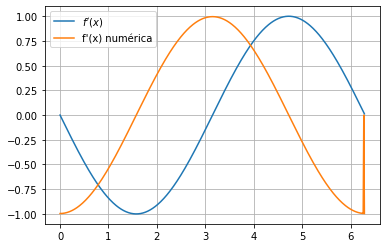

In [139]:
###Escogemos la malla uniforme
x1 = linspace(0,2*pi,500)
y1 = cos(x)
y_deriv1 = -sin(x)
y_num_deriv1 = deriv1(y1,x1)
#plot(x1,y1,label="$f(x)$")
plot(x1,y_deriv1,label="$f'(x)$")
plot(x1,y_num_deriv1,label="f'(x) numérica")
legend(),grid()
show()

###### Obteniendo el tiempo con una malla no unfirme y con la función primera derivada de orden 2:

In [140]:
##Definimos la primera derivada para una función f y cuya malla no es uniforme.
def deriv(f,x):
    f_prima = zeros(len(f))
    for i in range (2,len(f)-1):
        #h[i]=x[i]-x[i-1] #distancia a la izquierda de xi
        #g[i]=x[i+1]-x[i]
        f_prima[i]=(f[i+1]-f[i-1])/(x[i]-x[i-1]+x[i+1]-x[i])
    # calcular el ultimo punto
        h1=x[2]-x[1]
        h2=x[3]-x[2]
        
        h11=x[-1]-x[-2]
        h22=x[0]-x[-1]
        f_prima[1] = h2*(f[2]-f[1] )/(h1*h2-h1*h1)- h1*(f[3]-f[1])/(h2*h2-h2*h1)
       # f_prima[-1]=-(h11*(f[-2]-f[-1])/(h22*h11-h22*h22))+(h22*(f[-3]-f[-1])/(h11*h11-h22*h11))
       # f_prima[-1]=-(h11*(f[-2]-f[-1])/(h22*h11-h22*h22))+(h22*(f[-3]-f[-1])/(h11*h11-h22*h11))### revisar
    return f_prima
##Definimos una función f para transformar cualquier malla uniforme a una no uniforme.
def f(x):
    return x#**(1/2)
###Escogemos la malla
x = np.linspace(0, 2*pi, 50) #2*np.pi*f(np.linspace(0, 1, 50, endpoint=False))
##Escogemos la funcion f a la cual le aplicaremos la primera derivada
y = cos(x)
#y_deriv = -sin(x)
#y_num_deriv = deriv(y,x)
#plot(x,y,label="$f(x)$")
#plot(x,y_deriv,label="$f'(x)$")
#plot(x,y_num_deriv,label="f'(x) numérica")
#legend(),grid()
#show()

In [141]:
m1 = []
for m in range(1,100):
    m1.append(2*pi/m)
m1.sort()
#print (m1)
m2 = []
for n in range(9802,10202):
    m2.append(n)
m2.sort()
#print(m2)

In [142]:
M=(m1,m2)
#print(M)

In [143]:
#x1 =numpy.array(0, 2*pi, 9)
#x2=x1/2
#x3= np.array(pi+0.01, 2*pi, 9)
#x4=([x2],x[3])

In [144]:
# primer derivada en un malla no uniforme
def deriv(f,x):
    f_prima = zeros(len(f))
    for i in range (2,len(f)-1):
        #h[i]=x[i]-x[i-1] #distancia a la izquierda de xi
        #g[i]=x[i+1]-x[i]
        f_prima[i]=(f[i+1]-f[i-1])/(x[i]-x[i-1]+x[i+1]-x[i])
    # calcular el ultimo punto
        h1=x[2]-x[1]
        h2=x[3]-x[2]
        
        h11=x[-1]-x[-2]
        h22=x[0]-x[-1]
        f_prima[1] = h2*(f[2]-f[1] )/(h1*h2-h1*h1)- h1*(f[3]-f[1])/(h2*h2-h2*h1)
       # f_prima[-1]=-(h11*(f[-2]-f[-1])/(h22*h11-h22*h22))+(h22*(f[-3]-f[-1])/(h11*h11-h22*h11))
       # f_prima[-1]=-(h11*(f[-2]-f[-1])/(h22*h11-h22*h22))+(h22*(f[-3]-f[-1])/(h11*h11-h22*h11))### revisar
    return f_prima

In [145]:
#Definimos una función que nos modificará una malla uniforme
def f(x):
    return x#**(1/2)
#Definimos la malla uniforme con 500 puntos y se le aplica la funcion
x = 2*np.pi*f(np.linspace(0, 1, 500, endpoint=False))
#Definimos la función a la que le aplicaremos la derivida
y = cos(x)
#y_deriv = -sin(x)
y_num_deriv = deriv(y,x)
#plot(x,y,label="$f(x)$")
#plot(x,y_deriv,label="$f'(x)$")
#plot(x,y_num_deriv,label="f'(x) numérica")
#legend(),grid()
#show()

In [146]:
#Obtenemos el tiempo de la función 
%timeit (deriv(y,x))

5.26 ms ± 280 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
